<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Using-Python-IBM/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KNN**

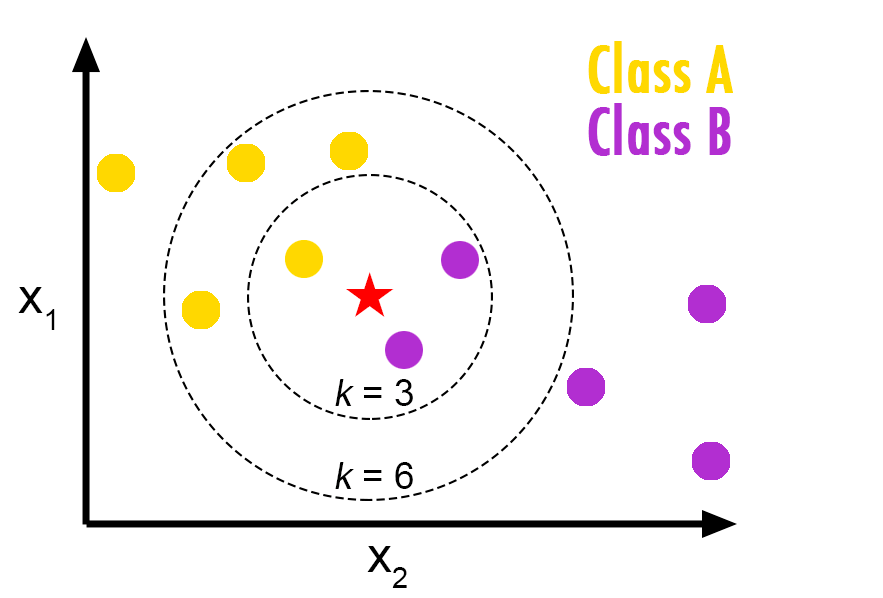

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

**Dataset**

In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-09 09:08:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.01s   

2020-05-09 09:08:21 (2.86 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
print('Total rows: ',len(df))
print()
print('Custcat categories')
print('-----------------')
df['custcat'].value_counts()

Total rows:  1000

Custcat categories
-----------------


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf611f4ba8>]],
      dtype=object)

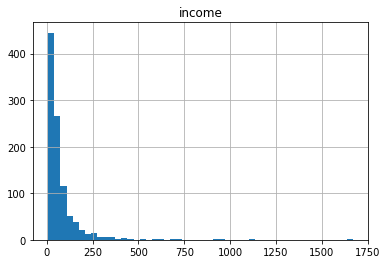

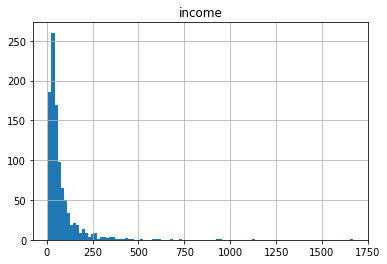

In [28]:
df.hist(column='income',bins=50)
df.hist(column='income',bins=100)

In [30]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [31]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [32]:
Y=df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3])

**Data Normalization**

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

**Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
print('Train set:', X_train.shape,  Y_train.shape)
print('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#**KNN Classification**
**[k=4]**

**Training**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k=4
neigh=KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

**Prediciting**

In [41]:
yhat = neigh.predict(X_test)
print(yhat[0:5])

[1 1 3 2 4]


**Accuracy**

In [42]:
from sklearn import metrics
print('Train set accuracy: ',metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(Y_test, yhat))

Train set accuracy:  0.5475
Test set Accuracy:  0.32


#**KNN** **Classification**
**[k=6]**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

k=6
neigh1=KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [48]:
yhat = neigh1.predict(X_test)
print(yhat[0:5])

[3 3 3 4 4]


In [49]:
from sklearn import metrics
print('Train set accuracy: ',metrics.accuracy_score(Y_train,neigh1.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(Y_test, yhat))

Train set accuracy:  0.51625
Test set Accuracy:  0.31
